In [36]:
from pandas import read_csv
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns



'\nX = inputdata["realised variance"]\ny = inputdata["VIX close"]\n\n# Preprocess the features (e.g., scale the features)\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n'

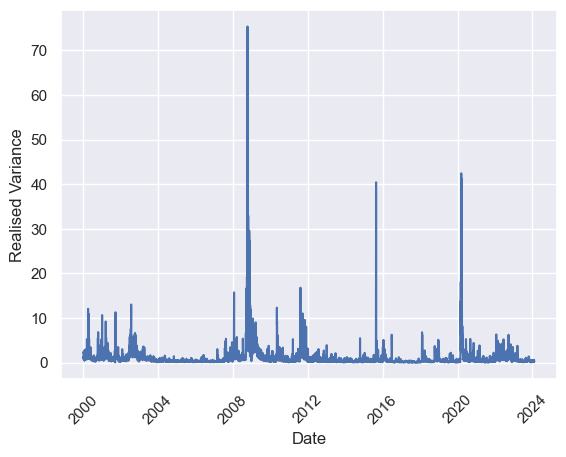

In [39]:
#read the excel file
inputdata = pd.read_excel('data.xlsx')
inputdata.index = pd.to_datetime(inputdata['date'], format = '%Y%m%d')

sns.set()
plt.ylabel('Realised Variance')
plt.xlabel('Date')
plt.xticks(rotation = 45)

plt.plot(inputdata.index, inputdata['realised variance'])

In [34]:
inputdata

,date,spx open,spx close,close-to-close log return,realised variance,VIX close
date,,,,,,
2000-01-04,20000104,1449.00,1399.37,-3.910060,2.156514,27.010000
2000-01-05,20000105,1395.62,1402.13,0.197037,2.381676,26.410000
2000-01-06,20000106,1398.87,1403.46,0.094811,1.270084,25.730000
2000-01-07,20000107,1403.45,1441.39,2.666731,0.928427,21.719999
2000-01-10,20000110,1441.47,1457.59,1.117646,1.296150,21.709999
...,...,...,...,...,...,...
2024-01-31,20240131,4899.19,4845.49,-1.619874,0.600985,14.350000
2024-02-01,20240201,4861.11,4905.95,1.240038,0.494250,13.880000
2024-02-02,20240202,4916.06,4958.04,1.056175,0.484765,13.850000


In [116]:
inputdata.shape

(6062, 6)

In [121]:
train = inputdata[inputdata.index<pd.to_datetime("2012-01-01", format ='%Y-%m-%d')]
test = inputdata[inputdata.index>=pd.to_datetime("2012-01-01", format ='%Y-%m-%d')]

indices = inputdata.index
[]
X_train = train.drop('realised variance', axis=1)
X_train = train.drop('VIX close', axis=1)
y_train = train['realised variance']
X_test = test.drop('realised variance', axis=1)
X_test = test.drop('VIX close', axis=1)

moving_X_test = X_train

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred = np.zeros(inputdata.shape[0] - train.shape[0])

for i in range(inputdata.size - train.size):

    y_pred = lasso_model.predict(moving_X_test)

    toAdd = inputdata.loc[indices[train.shape[0] + i]]
    toAdd.drop('realised variance')
    toAdd.drop('VIX close')
    moving_X_test = pd.concat([moving_X_test, toAdd], axis=0)
    

for pred in y_pred:
    print(pred)

print("Training score", lasso_model.score(X_train, y_train))
print("Test score", lasso_model.score(X_test, y_pred))

TypeError: Feature names are only supported if all input features have string names, but your input has ['Timestamp', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [107]:
indices = inputdata.index
indices

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-18',
               ...
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-29',
               '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02',
               '2024-02-05', '2024-02-06'],
              dtype='datetime64[ns]', name='date', length=6062, freq=None)

In [94]:
inputdata.size


36372

In [71]:
y_train

date
2000-01-04    2.156514
2000-01-05    2.381676
2000-01-06    1.270084
2000-01-07    0.928427
2000-01-10    1.296150
                ...   
2011-12-23    0.212672
2011-12-27    0.199910
2011-12-28    0.412212
2011-12-29    0.298701
2011-12-30    0.184260
Name: realised variance, Length: 3019, dtype: float64

In [72]:
train

,date,spx open,spx close,close-to-close log return,realised variance,VIX close
date,,,,,,
2000-01-04,20000104,1449.00,1399.37,-3.910060,2.156514,27.010000
2000-01-05,20000105,1395.62,1402.13,0.197037,2.381676,26.410000
2000-01-06,20000106,1398.87,1403.46,0.094811,1.270084,25.730000
2000-01-07,20000107,1403.45,1441.39,2.666731,0.928427,21.719999
2000-01-10,20000110,1441.47,1457.59,1.117646,1.296150,21.709999
...,...,...,...,...,...,...
2011-12-23,20111223,1254.00,1265.42,0.905767,0.212672,20.730000
2011-12-27,20111227,1265.02,1265.60,0.014224,0.199910,21.910000
2011-12-28,20111228,1265.38,1249.37,-1.290689,0.412212,23.520000


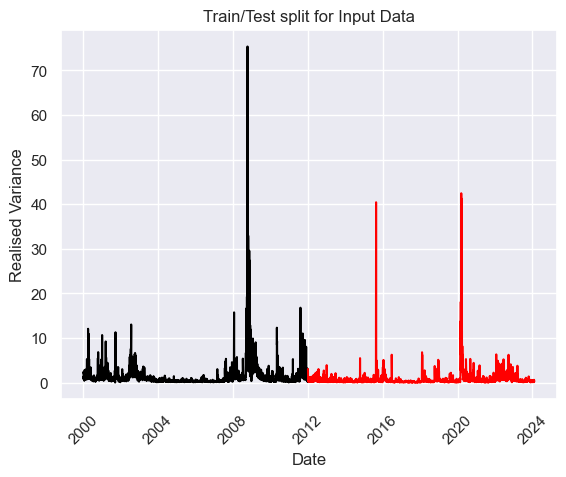

In [86]:
plt.plot(train['realised variance'], color = "black")
plt.plot(test['realised variance'], color = "red")
plt.ylabel('Realised Variance')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Input Data")
plt.show()

In [88]:
X_train.isna().sum()



date                          0
spx open                      0
spx close                     0
close-to-close log  return    0
realised variance             0
dtype: int64

In [83]:
inputdata.isna().sum()

date                           0
spx open                       0
spx close                      0
close-to-close log  return     0
realised variance              0
VIX close                     11
dtype: int64

In [93]:
# Instantiate and fit the Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

for pred in y_pred:
    print(pred)

print("Training score", lasso_model.score(X_train, y_train))
print("Test score", lasso_model.score(X_test, y_pred))

3.0167141331787715
0.4037039102553255
0.6590196767731182
0.3352653095576814
0.20712959744411652
1.2375500917343154
0.4222769156669597
0.42773159850729225
1.065007706029172
0.8900753296137864
0.4018604084957045
0.31270373023281595
0.1925580512492857
0.312092213415629
0.496110280599805
0.5253743689863515
0.5045973915263664
0.31890122373004903
1.2124257412223898
0.7848213635617505
0.8667071807070261
0.23676468864474742
0.9695762012245295
0.3702297326705688
0.3158417999533838
0.22446599071008055
0.3412811881672373
0.9652035395666552
0.47945060270698914
0.3276783669451979
0.557112179607786
0.30304763314499716
0.22215000518323924
0.307292190003726
0.2711862264560101
0.2137747986122931
0.18549696760229706
0.6954557095822373
0.27981573717578057
0.4545865534434963
0.5840429552233917
0.25689843210770835
0.331352558473331
1.2823501758874745
0.2596188450915542
0.65602685850194
0.22797402758622365
0.21142874061907024
0.4616892753289066
0.23005718390529895
0.25606416780102625
0.15735749457322945
0.1